In [1]:
%cd /home/kenji/Projects/BasicProjects/KNN_CarClassifier

/home/kenji/Projects/BasicProjects/KNN_CarClassifier


In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
## 1. Data
### 1.1 Load Data
data = pd.read_csv('Data/car.data')

In [64]:
### 1.2 Inspect Data
data.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [65]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   door      1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 712.2 KB


In [66]:
data.shape

(1728, 7)

In [14]:
#check for dupes
print(len(data[data.duplicated()]))

#check for missing
print(data[data.isnull().any(axis=1)])
print(data.isna().sum())

0
Empty DataFrame
Columns: [buying, maint, door, persons, lug_boot, safety, class]
Index: []
buying      0
maint       0
door        0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [16]:
data.dtypes

buying      object
maint       object
door        object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [17]:
data.nunique()

buying      4
maint       4
door        5
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [18]:
#### 1.2.2 Inspect and Modify Columns
data.columns
# already formatted lower.

Index(['buying', 'maint', 'door', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [48]:
for i in data.columns:
    print(data[i].value_counts())


med      432
vhigh    432
high     432
low      432
Name: buying, dtype: Int64
med      432
vhigh    432
high     432
low      432
Name: maint, dtype: Int64
2        432
3        432
4        432
5more    405
more      27
Name: door, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
med      576
small    576
big      576
Name: lug_boot, dtype: Int64
med     576
high    576
low     576
Name: safety, dtype: Int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: Int64


In [47]:
for i in data.columns:
    print(i)
    print(data[i].unique())

buying
<StringArray>
['vhigh', 'high', 'med', 'low']
Length: 4, dtype: string
maint
<StringArray>
['vhigh', 'high', 'med', 'low']
Length: 4, dtype: string
door
['2' '3' '4' '5more' 'more']
persons
['2' '4' 'more']
lug_boot
<StringArray>
['small', 'med', 'big']
Length: 3, dtype: string
safety
<StringArray>
['low', 'med', 'high']
Length: 3, dtype: string
class
<StringArray>
['unacc', 'acc', 'vgood', 'good']
Length: 4, dtype: string


In [25]:
data.head()
# While door and persons appear to be numeric variables, they are in fact categorical. The rest are and can be treated as strings for possible processing optimization prior to being transformed.

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [36]:
data.door.value_counts()
# note the clearly categorical values.

2        432
3        432
4        432
5more    405
more      27
Name: door, dtype: int64

In [38]:
strings = ['buying','maint','lug_boot','safety','class']
for i in strings:
    data[i] = data[i].astype('string')

data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   string
 1   maint     1728 non-null   string
 2   door      1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   string
 5   safety    1728 non-null   string
 6   class     1728 non-null   string
dtypes: object(2), string(5)
memory usage: 712.2 KB


In [42]:
### 1.3 EDA: Initial Summary Stats
data.describe(include='all')

,buying,maint,door,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,5,3,3,3,4
top,med,med,2,2,med,med,unacc
freq,432,432,432,576,576,576,1210


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: Int64

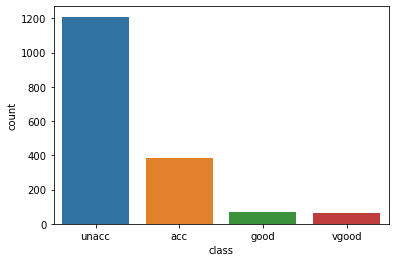

In [81]:
### 1.4 EDA: Initial Visualization of Summary Stats
sns.countplot(x=data['class'], order=['unacc', 'acc', 'good', 'vgood'])
data['class'].value_counts()

med      432
vhigh    432
high     432
low      432
Name: buying, dtype: Int64

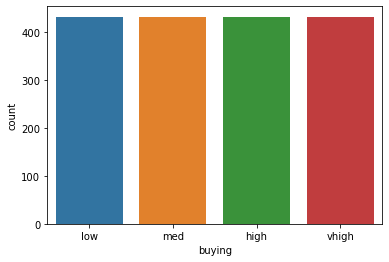

In [80]:
sns.countplot(x=data.buying, order=['low', 'med', 'high', 'vhigh'])
data.buying.value_counts()


med      432
vhigh    432
high     432
low      432
Name: maint, dtype: Int64

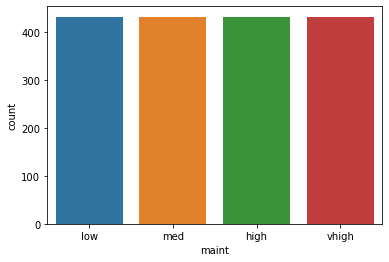

In [82]:
sns.countplot(x=data.maint, order=['low', 'med', 'high', 'vhigh'])
data.maint.value_counts()

In [84]:
data[data.buying == 'vhigh']
# It appears that the data is evenly split in four n at least two variables.
# Checking below, we see that the overlap is not perfect; where 'buying' equals 'vhigh' doesn't necessarily correlate to where 'maint' equals 'vhgh' or 'low'.

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
427,vhigh,low,5more,more,med,med,acc
428,vhigh,low,5more,more,med,high,acc
429,vhigh,low,5more,more,big,low,unacc
430,vhigh,low,5more,more,big,med,acc


2        432
3        432
4        432
5more    405
more      27
Name: door, dtype: int64

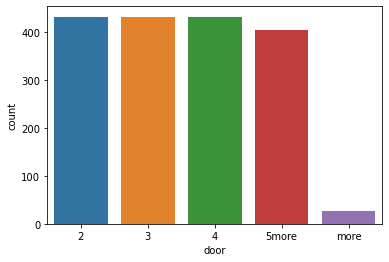

In [87]:
sns.countplot(x=data.door, order=['2', '3', '4', '5more','more'])
data.door.value_counts()
# again a split, however '5more' has been slightly reduced for a fifth value, 'more'.

2       576
4       576
more    576
Name: persons, dtype: int64

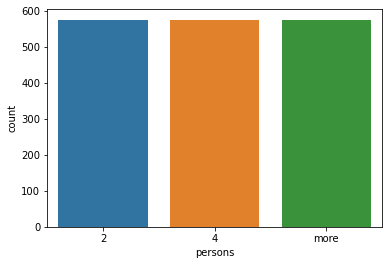

In [89]:
sns.countplot(x=data.persons, order=['2', '4', 'more'])
data.persons.value_counts()

med      576
small    576
big      576
Name: lug_boot, dtype: Int64

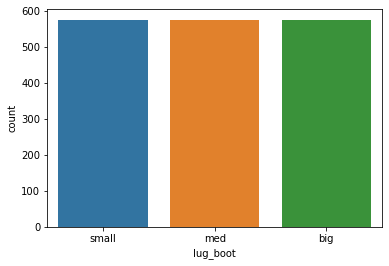

In [91]:
sns.countplot(x=data.lug_boot, order=['small', 'med', 'big'])
data.lug_boot.value_counts()

med     576
high    576
low     576
Name: safety, dtype: Int64

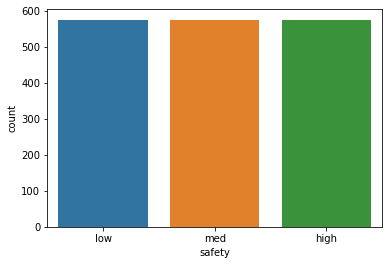

In [93]:
sns.countplot(x=data.safety, order=['low', 'med', 'high'])
data.safety.value_counts()

In [ ]:
## 2. Preprocessing

In [100]:
### 2.1 Reinspect Data
data.info(memory_usage='deep')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   string
 1   maint     1728 non-null   string
 2   door      1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   string
 5   safety    1728 non-null   string
 6   class     1728 non-null   string
dtypes: object(2), string(5)
memory usage: 712.2 KB


,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [109]:
### 2.2 Diagnose Data
# This data is extremely clean, which is great for a simple project. ALthough the mostly even splits throughout the data are initially concerning, there doesn't seem to be any significant overlap, at this time.
#TODO chi square!

In [110]:
### 2.3 Data Wrangling

In [76]:
## 2.3. Data Transformation
encoder = LabelEncoder()
for i in data.columns:
    data[i] = encoder.fit_transform(data[i])
#data.reset_index(inplace=True)
    

In [77]:
data

,buying,maint,door,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


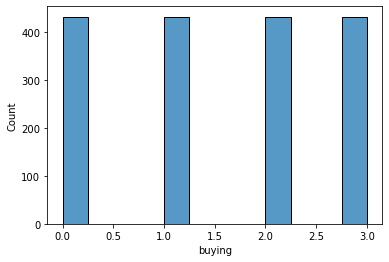

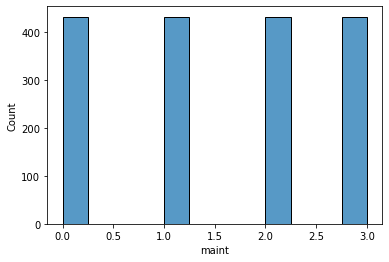

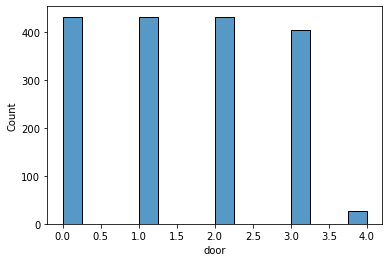

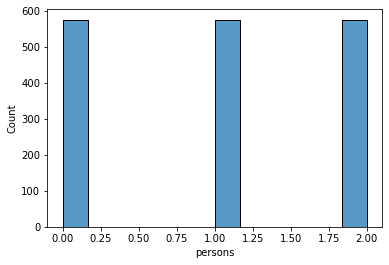

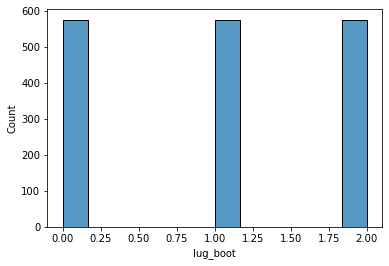

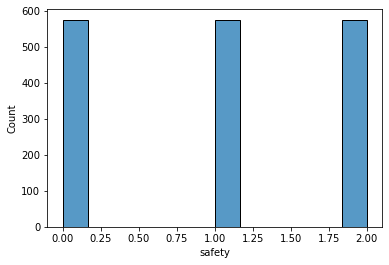

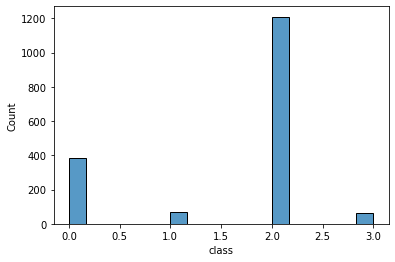

In [78]:
for i in data.columns:
    ax = sns.histplot(data, x =i)
    plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler
# standardize data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

scaled_features_df = pd.DataFrame(standardized_data, index=data.index, columns=data.columns)

In [83]:
scaled_features_df

,buying,maint,door,persons,lug_boot,safety,class
0,1.341641,1.341641,-1.323069,-1.224745,1.224745,0.000000,0.510177
1,1.341641,1.341641,-1.323069,-1.224745,1.224745,1.224745,0.510177
2,1.341641,1.341641,-1.323069,-1.224745,1.224745,-1.224745,0.510177
3,1.341641,1.341641,-1.323069,-1.224745,0.000000,0.000000,0.510177
4,1.341641,1.341641,-1.323069,-1.224745,0.000000,1.224745,0.510177
...,...,...,...,...,...,...,...
1723,-0.447214,-0.447214,1.295789,1.224745,0.000000,1.224745,-0.631773
1724,-0.447214,-0.447214,1.295789,1.224745,0.000000,-1.224745,1.652127
1725,-0.447214,-0.447214,1.295789,1.224745,-1.224745,0.000000,0.510177
1726,-0.447214,-0.447214,1.295789,1.224745,-1.224745,1.224745,-0.631773


In [85]:
## 3. EDA
### 3.1 Summary Stats
data.describe()

,buying,maint,door,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.515625,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.145869,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,3.000000


In [90]:
duplicates = data.duplicated()
(duplicates == True).sum()

0

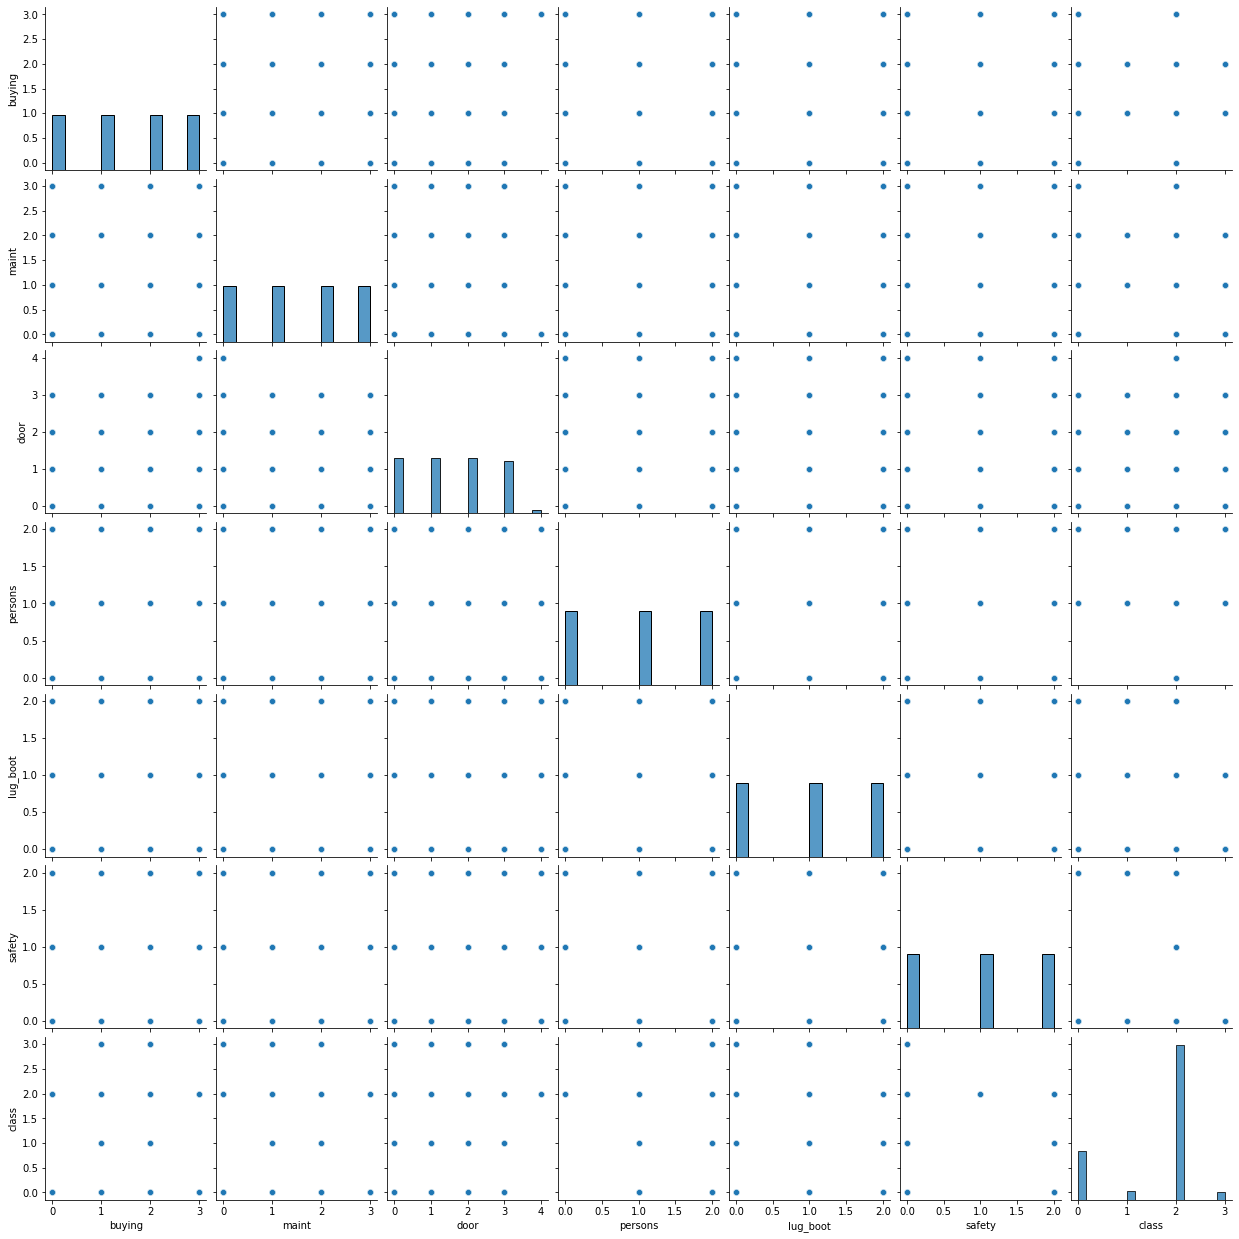

In [92]:
### 3.2 EDA: Initial Visualization
sns.pairplot(data)
plt.show()

In [11]:
### 3.3 Feature Associations
# Convariance: Strength of Linear relationships

In [94]:
#Split Data
target = 'class'
y_data = data[target]
data[target] = y_data

print(y_data)
print(data)

x = np.array(data.drop([target],axis=1))
y = np.array(data[target])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int64
      buying  maint  door  persons  lug_boot  safety  class
0          3      3     0        0         2       1      2
1          3      3     0        0         2       2      2
2          3      3     0        0         2       0      2
3          3      3     0        0         1       1      2
4          3      3     0        0         1       2      2
...      ...    ...   ...      ...       ...     ...    ...
1723       1      1     3        2         1       2      1
1724       1      1     3        2         1       0      3
1725       1      1     3        2         0       1      2
1726       1      1     3        2         0       2      1
1727       1      1     3        2         0       0      3

[1728 rows x 7 columns]


In [95]:
#Fit/Train Model
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
#Evaluate Model
y_pred = KNN.predict(x_test)
probabilities = KNN.predict_proba(x_test)

def evaluate(model,y_pred,y_test):
    if model == 'linreg':
        print(linreg.score(x_test,y_test))
        print(linreg.coef_)
        y_pred = linreg.predict(x_test)
        #print(f'The Intercept (grade) is {linreg.intercept_}')
        for i in range(len(y_pred)):
            print(f'Predicted: {round(y_pred[i])}\t Actual: {y_test[i]} \t Data {x_test[i]}')
    if model == 'KNN':
        print(KNN.score(x_test,y_test))
        y_pred = y_pred.tolist()
        y_test = y_test.tolist()
        classes = ['unacc','acc','good','vgood']
        for i in range(len(y_pred)):
            print(f'Pred: {classes[y_pred[i]]}\t Actual: {classes[y_test[i]]} \t Probability: {probabilities[i]}')
    return

In [97]:
print(evaluate('KNN',y_pred,y_test))

0.8497109826589595
Pred: good	 Actual: good 	 Probability: [0.33333333 0.         0.66666667 0.        ]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: unacc	 Actual: unacc 	 Probability: [0.66666667 0.         0.33333333 0.        ]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: good	 Actual: good 	 Probability: [0.33333333 0.         0.66666667 0.        ]
Pred: acc	 Actual: unacc 	 Probability: [0.33333333 0.66666667 0.         0.        ]
Pred: unacc	 Actual: unacc 	 Probability: [0.66666667 0.         0.33333333 0.        ]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: unacc	 Actual: vgood 	 Probability: [0.33333333 0.33333333 0.33333333 0.        ]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: unacc	 Actual: unacc 

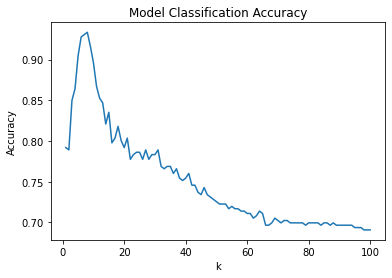

In [98]:
accuracies = []
for k in range(1,101):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    accuracies.append(KNN.score(x_test,y_test))
    highest = max(accuracies)


k_list = range(1,101)
plt.plot(k_list,accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Classification Accuracy')
plt.show()

In [99]:
#TODO get and possibly plot distances
#TODO apply gridsearch?
#TODO make probabilities more interpretable
#TODO make eval function.. better
#TODO add more EDA graphs for groupings and variable comparisons (stats)
#TODO can this be self-tuning w/gridsearch?